<a href="https://colab.research.google.com/github/ludovina-magalhaes/Valor_arrendamento/blob/main/Valor_Arrendamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CORRELAÇÃO E REGRESSÃO LINEAR

In [ ]:
# Importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms

Objetivo: Analisar a correlação da relação entre a área dos imóveis (em metros quadrados) e o valor do aluguer numa determinada cidade e criar um modelo de regressão linear.

In [ ]:
#Importar dados para um DataFrame
df = pd.read_csv('/content/drive/MyDrive/Projectos/Valor da renda/Valor_da_renda.csv')

In [ ]:
# Mostrar o Arquivo
print("Entradas: ", df[df.columns[0]].count())
print("Variáveis: ", df.shape[1])
df.head()

Entradas:  3000
Variáveis:  7


,valor_renda,area_m2,ano_construcao,codigo_localidade,numero_wc,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [ ]:
# Verificar os tipos de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_renda        3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_wc          3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [ ]:
# Análise dos tipos de atributos.
# object: strings
# int64: inteiros
# float64: float
# complex: complexos
df.dtypes

,0
valor_renda,float64
area_m2,int64
ano_construcao,int64
codigo_localidade,int64
numero_wc,int64
numero_cozinhas,int64
codigo_bairro,int64


##Análise Exploratória dos Dados

Valores Missing (NAN)


In [ ]:
# Verificar a existência de dados duplicados
duplicados = df.duplicated().sum()
print(f'O número de linhas duplicadas no DataFrame é: {duplicados}.')

O número de linhas duplicadas no DataFrame é: 0.


In [ ]:
# Verificar se existem dados nulos
nulos = df.isnull().sum()
print(nulos)

valor_renda          0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_wc            0
numero_cozinhas      0
codigo_bairro        0
dtype: int64


Como a questão de negócio está direcionada ao valor do aluguer do imóvel, o foco será nesta variável.

In [ ]:
# Resumo estatístico da variável 'valor_renda'
df["valor_renda"].describe()

,valor_renda
count,3000.000000
mean,459.643146
std,195.865692
min,40.512820
25%,320.961530
50%,426.897435
75%,560.282055
max,1843.384600


Com essas informações, foi possível perceber que a maioria dos valores da renda está próxima da média, que é de 459. Além disso, os quartis destacam alguns pontos importantes: o valor mínimo da renda foi 40, a mediana ficou em 426 e o valor máximo atingiu 1843. Estes dados ajudam a compreender como os valores estão distribuídos.

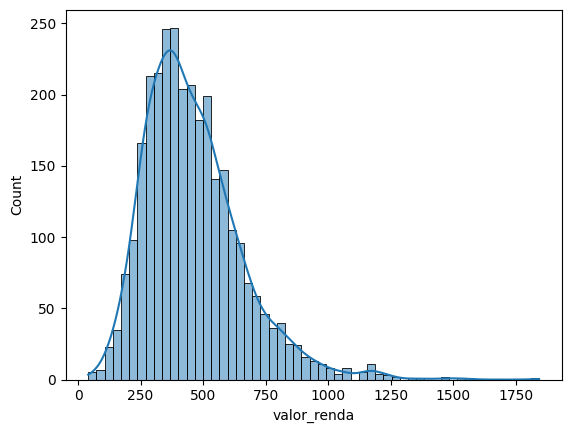

In [ ]:
# Histograma da variável alvo 'valor_renda'
k = sns.histplot(data = df, x = "valor_renda", kde = True)

Como verificamos anteriormente no resumo estatístico, a maioria dos valores está próxima da média, em torno de 400. Como o método escolhido para identificar uma tendência nos valores foi a regressão linear, vamos realizar uma análise de correlação entre cada variável.

## ANÁLISE DA CORRELAÇÃO LINEAR

In [ ]:
df.columns

Index(['valor_renda', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_wc', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [ ]:
# Correlação entre as variáveis
df.corr()

,valor_renda,area_m2,ano_construcao,codigo_localidade,numero_wc,numero_cozinhas,codigo_bairro
valor_renda,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_wc,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


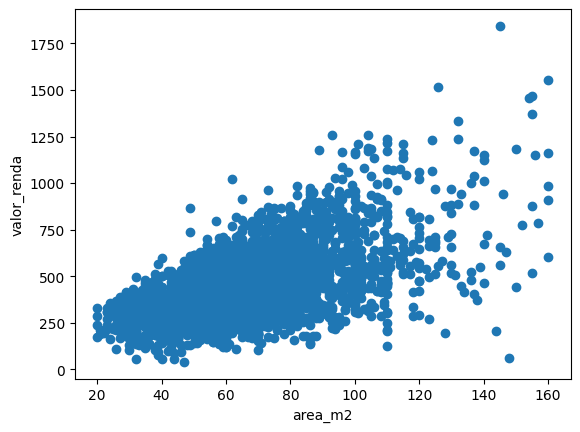

In [ ]:
# Vamos analisar a relação entre a variável de entrada 'area_m2' e a variável 'valor_renda'
plt.scatter(df.area_m2,df.valor_renda)
plt.xlabel('area_m2')
plt.ylabel('valor_renda')
plt.grid(False)
plt.show()


Como observado acima, concluiu-se que existe, de facto, uma correlação entre as variáveis. À medida que a área do imóvel aumenta, o valor do aluguer também tende a subir. No entanto, alguns pontos fora da curva foram identificados, e estes poderiam ser tratados com métodos de exclusão de outliers(como vimos no boxplot) para melhorar o processo de regressão realizado.


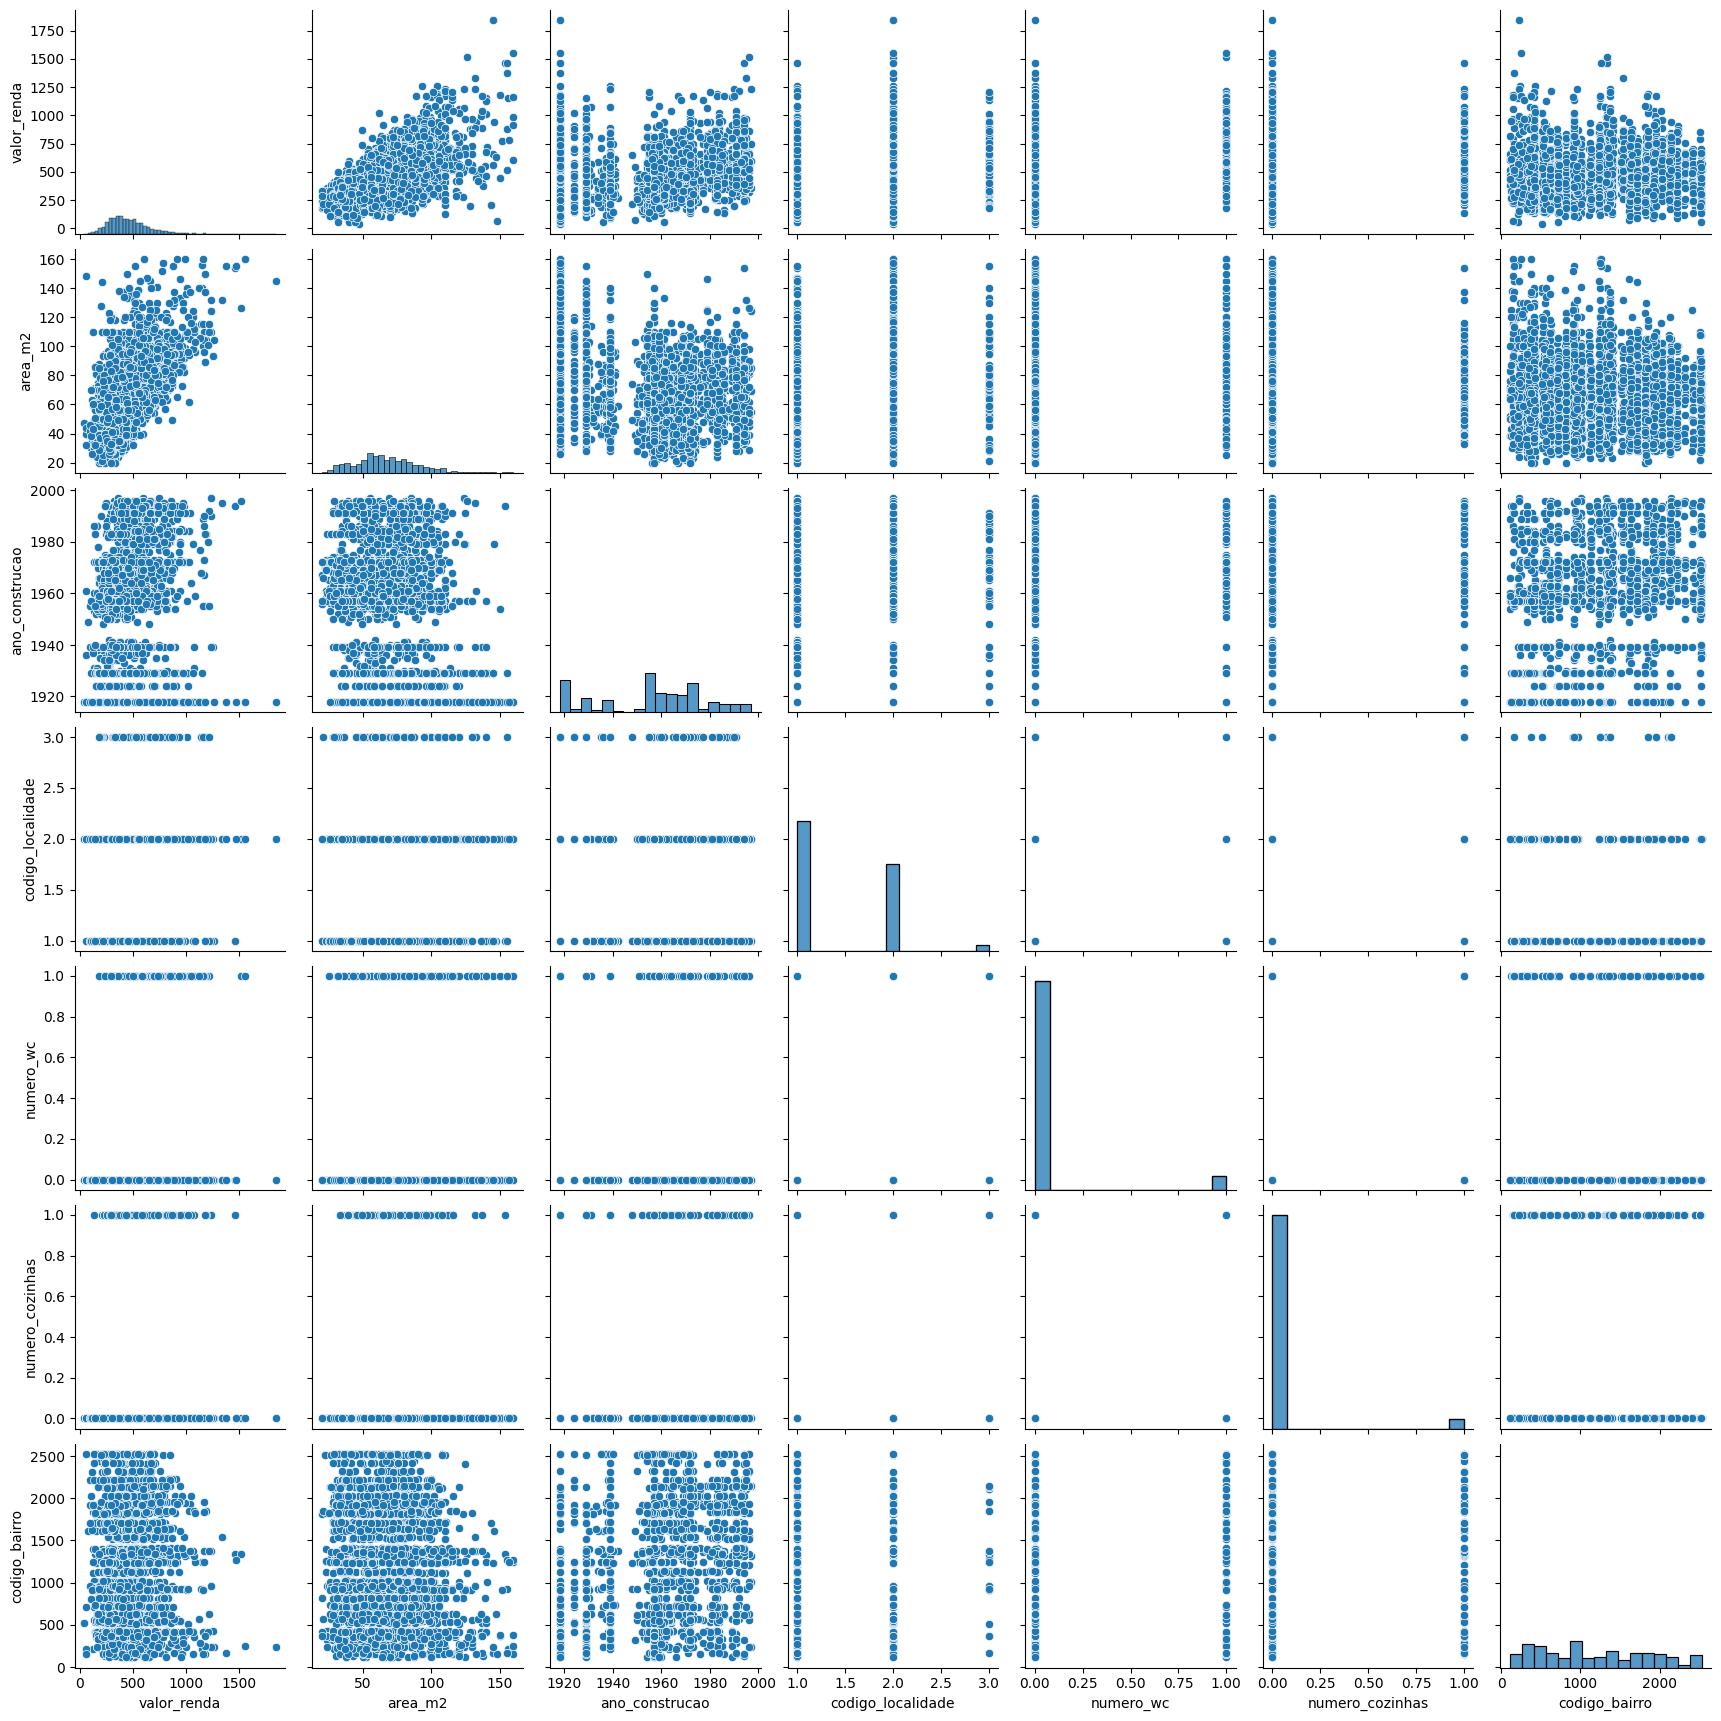

In [ ]:
sns.pairplot(df);

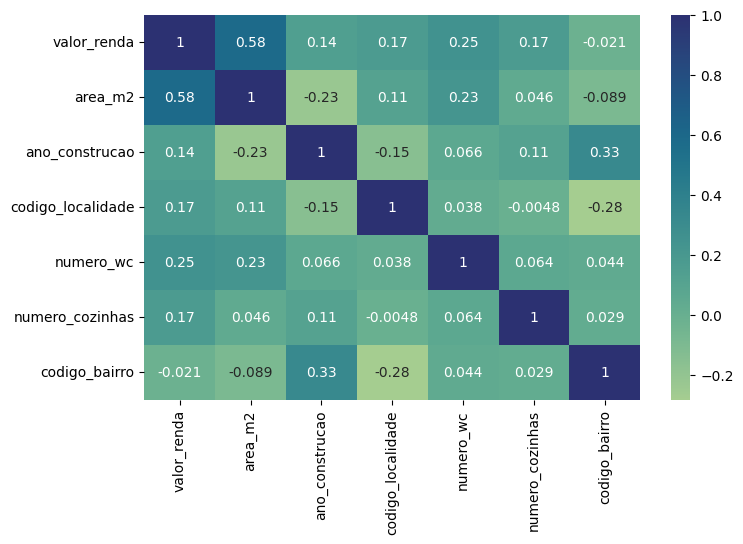

In [ ]:
from matplotlib import pyplot as plt

# Selecionando apenas as colunas numéricas
df_numerical = df.select_dtypes(include=[float, int])

# Calculando a matriz de correlação
corr = df_numerical.corr()

# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap="crest")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['valor_renda', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_wc', 'numero_cozinhas', 'codigo_bairro']]

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Variable,VIF
0,valor_renda,10.705420
1,area_m2,13.948239
2,ano_construcao,22.596897
3,codigo_localidade,8.897292
4,numero_wc,1.152745
5,numero_cozinhas,1.082629
6,codigo_bairro,4.471894


Como o foco da análise era determinar o valor da renda com base na área em m² do imóvel, o valor da renda foi estabelecido como a variável dependente, a ser explicada pelas variações da área em m², considerada a variável independente.

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

mod1 = smf.ols(formula = 'valor_renda ~ area_m2 + ano_construcao', data=df)
res = mod1.fit()

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            valor_renda   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1085.
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:41:40   Log-Likelihood:                -19272.
No. Observations:                3000   AIC:                         3.855e+04
Df Residuals:                    2997   BIC:                         3.857e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4826.5928    247.510    -19.


 **Desempenho do Modelo**:

 Este relatório do modelo apresenta várias informações importantes para avaliar a adequação do modelo na tentativa de prever a correlação entre as variáveis.

O "R-Squared" representa a proporção da variabilidade dos dados que o modelo consegue explicar. Um valor de 34.2% significa que o modelo explica essa porcentagem dos dados observados. Quanto mais próximo de 1, maior a capacidade do modelo em prever os padrões dos dados.
 O "P>t" mostra a probabilidade de que o modelo seja eficaz na descrição da relação entre as variáveis. Valores baixos de "P>t" indicam que é pouco provável que a variável não tenha efeito sobre a variável dependente. O intervalo "[0.025 0.975]" sugere que, se os valores do coeficiente estiverem fora deste intervalo (116.541 a 150.856), podem ser considerados outliers.

No caso da "area_m2", o coeficiente de 5.3755 indica que, para cada metro quadrado adicional, o valor do aluguel tende a aumentar em 5.3755 unidades monetárias.

Esta análise serve para avaliar como o modelo se comporta em relação às variáveis e sua capacidade de prever com precisão o valor do aluguer com base nas variáveis observadas.
   



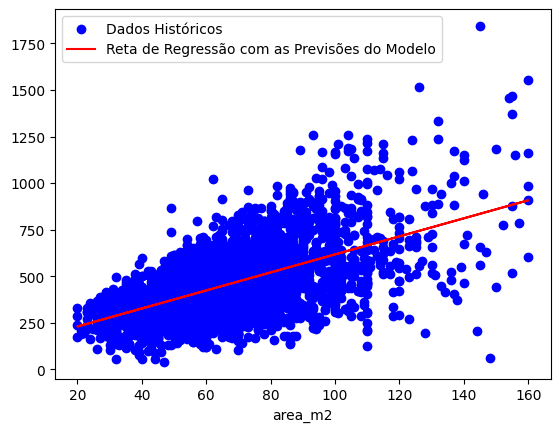

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = df[['area_m2']]
y = df['valor_renda']
modelo = LinearRegression()
modelo.fit(x, y)


plt.scatter(x, y, color="blue", label="Dados Históricos")
plt.plot(x, modelo.predict(x), color="red", label="Reta de Regressão com as Previsões do Modelo")
plt.xlabel("area_m2")  # Changed from "valor" to "area_m2"")
plt.legend()
plt.show()

Vamos avaliar o modelo proposto, existe uma correlação entre o modelo e os dados analisados. Isto pode ser confirmado pelo relatório do modelo apresentado anteriormente. Conclui-se que o método consegue ajustar-se a 34,2% dos dados fornecidos, que os dados apresentados não possuem uma distribuição normal e que não há simetria na distribuição dos dados. Como o "P>t" apresentou um valor de 0,000, isto significa que a variável m² tem uma probabilidade baixa de não ter efeito sobre a variável alvo "valor da renda".
O ideal seria utilizar mais variáveis de entrada para construir o modelo, a fim de compreender se outros fatores influenciam o valor da renda. Como se pôde verificar que o número de casas de banho e o ano podem afetar o comportamento da variável alvo "valor da renda".
Esta correlação apresentada entre o valor da renda e o tamanho do imóvel não implica necessariamente causalidade, apenas apresenta uma tendência de correlação entre estes dois tipos de dados neste contexto. Outras avaliações e análises são importantes para confirmar uma conclusão de causalidade.
